### <i>  Explore how different hyperparameters influence the behavior of a Random Forest classifier On Parkinson Dataset </i>

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [123]:
df = pd.read_csv("dataset.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,...,0.065450,0.022110,21.033000,1.000000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,...,0.094030,0.019290,19.085000,1.000000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,...,0.082700,0.013090,20.651000,1.000000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,...,0.087710,0.013530,20.644000,1.000000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,...,0.104700,0.017670,19.649000,1.000000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,synth_7756,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,...,0.050788,0.021377,21.884979,0.736271,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,synth_5355,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,...,0.049785,0.020925,21.973752,0.798377,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,synth_6356,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,...,0.051215,0.021530,21.615298,0.771907,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,synth_7098,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,...,0.049023,0.026806,21.561977,0.704315,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734


### <i> Dataset Overview </i>

In [124]:
# 1. Overview of the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1195 non-null   object 
 1   MDVP:Fo(Hz)       1195 non-null   float64
 2   MDVP:Fhi(Hz)      1195 non-null   float64
 3   MDVP:Flo(Hz)      1195 non-null   float64
 4   MDVP:Jitter(%)    1195 non-null   float64
 5   MDVP:Jitter(Abs)  1195 non-null   float64
 6   MDVP:RAP          1195 non-null   float64
 7   MDVP:PPQ          1195 non-null   float64
 8   Jitter:DDP        1195 non-null   float64
 9   MDVP:Shimmer      1195 non-null   float64
 10  MDVP:Shimmer(dB)  1195 non-null   float64
 11  Shimmer:APQ3      1195 non-null   float64
 12  Shimmer:APQ5      1195 non-null   float64
 13  MDVP:APQ          1195 non-null   float64
 14  Shimmer:DDA       1195 non-null   float64
 15  NHR               1195 non-null   float64
 16  HNR               119

In [125]:
print("\nDataset Description:")
print(df.describe())


Dataset Description:
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count  1195.000000   1195.000000   1195.000000     1195.000000   
mean    154.312848    197.246916    116.332971        0.006221   
std      17.124313     37.804828     17.953210        0.002001   
min      88.333000    102.145000     65.476000        0.001680   
25%     150.616420    189.666263    112.204966        0.005769   
50%     154.117666    197.198334    116.100612        0.006188   
75%     157.491303    204.071906    119.290367        0.006557   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)     MDVP:RAP     MDVP:PPQ   Jitter:DDP  MDVP:Shimmer  \
count       1195.000000  1195.000000  1195.000000  1195.000000   1195.000000   
mean           0.000044     0.003306     0.003428     0.009920      0.029671   
std            0.000014     0.001228     0.001140     0.003678      0.007781   
min            0.000007     0.000680     0.000920     0.002040 

In [126]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### <i> Data Preprocessing </i>

In [127]:
# 2. Check for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [128]:
# 3. Drop non-informative columns (e.g., 'name' if not useful for prediction)
df.drop(columns=['name'], inplace=True)

In [129]:
from sklearn.preprocessing import StandardScaler

# 4. Normalize the numerical columns (excluding target 'status')
features = df.drop(columns=['status'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create a new DataFrame for scaled features
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# 5. Concatenate the scaled features with the target variable
df = pd.concat([features_scaled_df, df['status'].reset_index(drop=True)], axis=1)

In [130]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-2.005057,-1.057051,-2.303392,0.809089,1.818634,0.320877,1.854444,0.318144,1.808964,1.781082,...,1.457125,-0.165760,-0.471841,-1.936391,4.239821,1.930428,1.159888,-0.511577,2.092854,1.000000
1,-1.864379,-1.286007,-0.140088,1.728795,2.513746,1.094524,3.101002,1.093323,4.071927,4.264923,...,3.724625,-0.334524,-1.536912,-0.923066,4.424839,3.566647,3.162268,0.664032,4.350633,1.000000
2,-2.198430,-1.750136,-0.266246,2.138664,3.208858,1.737872,3.847181,1.743386,2.913444,2.476557,...,2.825717,-0.705566,-0.680700,-1.584974,4.676728,2.750606,2.454794,-0.252777,3.382169,1.000000
3,-2.198781,-1.571248,-0.276778,1.873748,3.208858,1.395839,3.118559,1.395235,3.246460,2.911229,...,3.223204,-0.679234,-0.684528,-1.466982,4.412347,3.472824,3.120457,0.148544,4.358721,1.000000
4,-2.237455,-1.467779,-0.316397,3.308290,4.599083,2.641818,4.962060,2.649121,4.446087,3.743316,...,4.571169,-0.431474,-1.228545,-1.876558,4.597934,4.292695,0.233597,-0.316683,5.470144,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,-0.191892,-0.477404,0.137331,0.186272,-0.285618,0.124138,0.074850,-0.323402,-0.319569,-0.217171,...,0.293836,-0.209638,-0.006021,0.034274,0.410142,-0.197139,0.225569,0.064536,0.107676,0.736271
1191,0.434630,0.371877,-0.086281,0.087626,0.082108,0.194614,-0.360551,-0.089599,-0.088547,0.238411,...,0.214314,-0.236706,0.042515,0.026864,0.451771,0.176302,0.267403,-0.122220,0.075205,0.798377
1192,-0.349922,-0.075356,0.124665,0.056818,-0.004597,0.144250,-0.036722,-0.255802,-0.009354,0.100299,...,0.327708,-0.200493,-0.153470,-0.013833,-0.023014,-0.193149,0.212632,0.180191,0.452072,0.771907
1193,-0.128908,0.334308,-0.191092,-0.461397,-0.216275,-0.430073,0.068478,-0.144686,-0.015553,0.087457,...,0.153845,0.115248,-0.182623,-0.268789,0.188460,0.014130,0.303269,0.287723,0.321454,0.704315


###  <i> Expolatory Data Analysis And Visulizations </i>

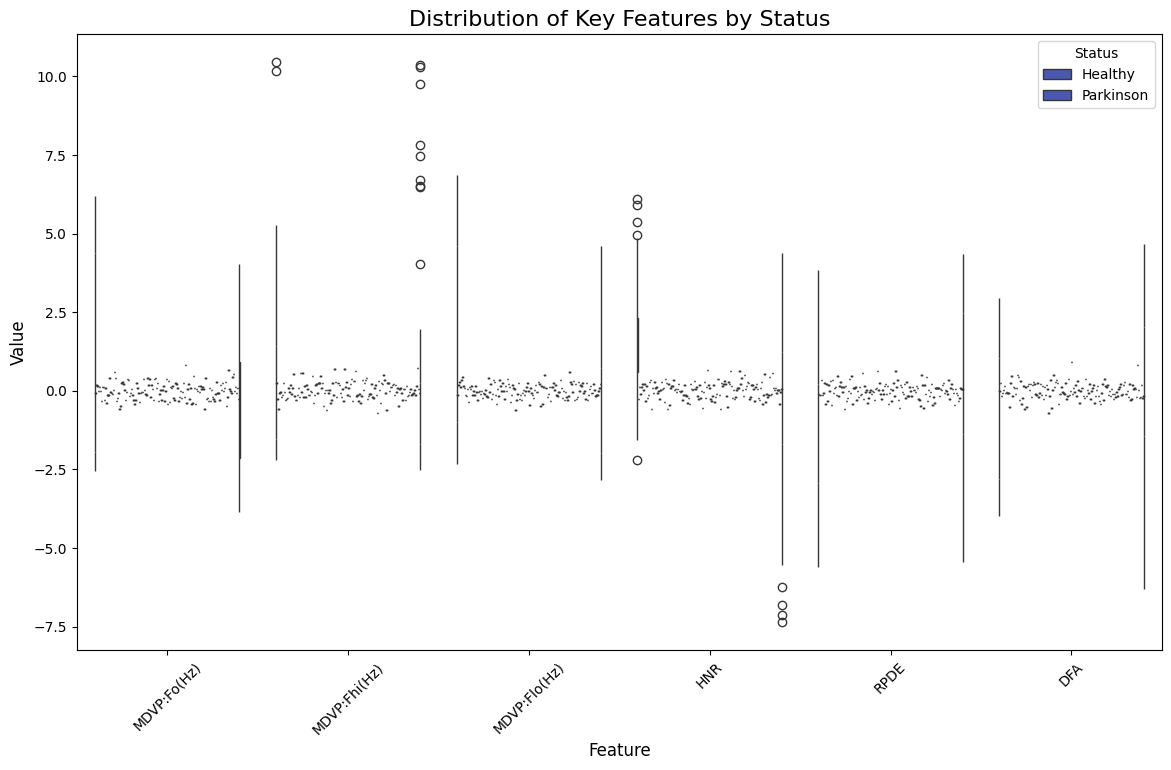

In [131]:
# Define key features to analyze
key_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR', 'RPDE', 'DFA']

# Melt the dataframe to reshape for visualization
# 'status' is kept as the identifier variable, and other columns are combined into a single 'Feature' column
df_melted = df.melt(id_vars=['status'], value_vars=key_features, var_name='Feature', value_name='Value')

# Set up the figure for the plot
plt.figure(figsize=(14, 8))

# Create a boxplot to compare the distribution of each feature by status
sns.boxplot(data=df_melted, x='Feature', y='Value', hue='status', palette='coolwarm')

# Add a title and labels to the plot
plt.title('Distribution of Key Features by Status', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Adjust the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Customize the legend to show clear labels for the 'status' categories
plt.legend(title='Status', labels=['Healthy', 'Parkinson'])

# Display the plot
plt.show()


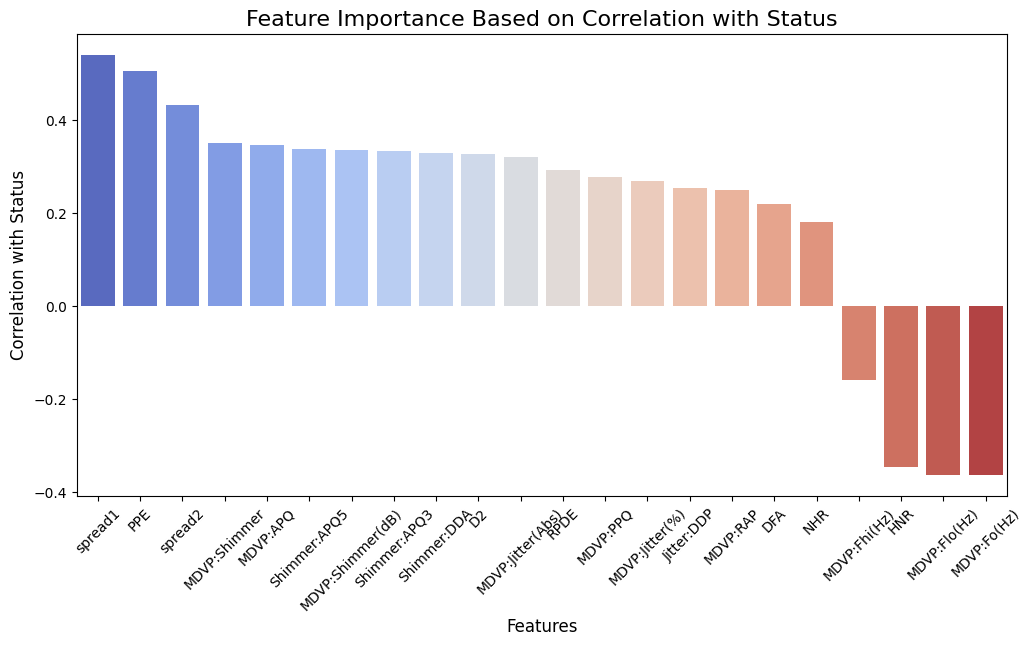

In [132]:
# Calculate the correlation of all features with the 'status' column
# Drop the 'status' itself from the correlation results
feature_corr = df.corr()['status'].drop('status').sort_values(ascending=False)

# Set up the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a barplot to visualize feature correlations with 'status'
sns.barplot(x=feature_corr.index, y=feature_corr.values, palette='coolwarm')

# Add title and axis labels for clarity
plt.title('Feature Importance Based on Correlation with Status', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation with Status', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Display the plot
plt.show()


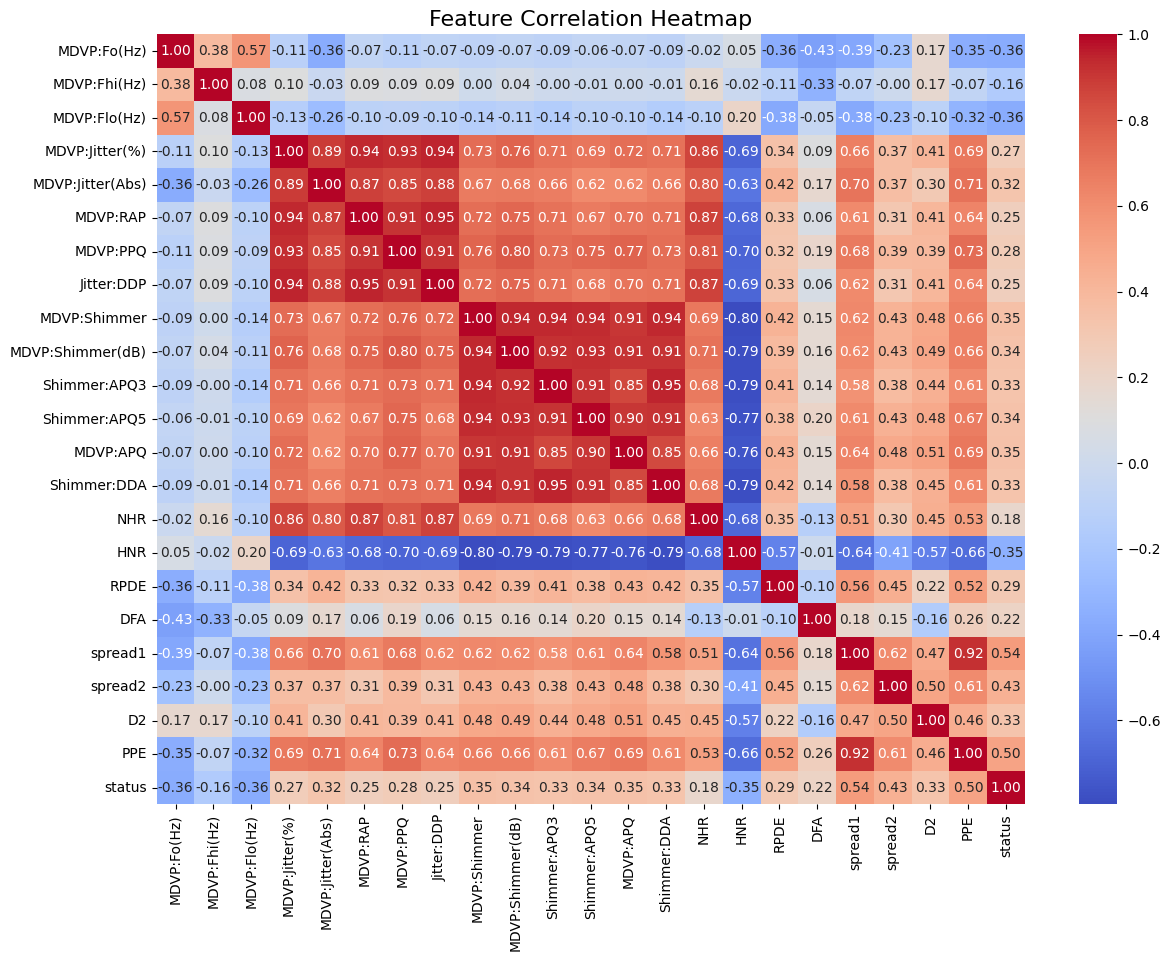

In [133]:
# Set up the figure size for the heatmap
plt.figure(figsize=(14, 10))

# Compute the correlation matrix for all features in the dataset
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(
    correlation_matrix,           # Data to plot
    annot=True,                   # Annotate each cell with correlation values
    fmt='.2f',                    # Format the correlation values to 2 decimal places
    cmap='coolwarm',              # Use a visually appealing color palette
    cbar=True                     # Display a color bar to indicate the strength of correlations
)

# Add a title to the heatmap
plt.title('Feature Correlation Heatmap', fontsize=16)

# Display the plot
plt.show()


In [134]:
# Importing the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Importing GridSearchCV for hyperparameter tuning and train_test_split for splitting the dataset
from sklearn.model_selection import GridSearchCV, train_test_split

# Importing accuracy_score to evaluate the performance of the model
from sklearn.metrics import accuracy_score


In [135]:
df['status'] = df['status'].astype('int')  # Ensure it is integer type


# Assuming your preprocessed dataset is stored in 'df_preprocessed'
X = df.drop(columns=['status'])
y = df['status']

In [136]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,            # Features (X) and target variable (y)
    test_size=0.3,   # Proportion of the data to use as the test set (30%)
    random_state=42  # Seed for reproducibility of the split
)

# Define the hyperparameter grid for tuning the RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees in the forest (50, 100, or 200)
    'max_depth': [5, 10, 20, None],      # Maximum depth of each tree (5, 10, 20, or unlimited depth)
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
                                         # 'sqrt': Square root of the total features
                                         # 'log2': Logarithm (base 2) of the total features
                                         # None: Use all features
}


In [137]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)  
# A Random Forest model is created with a fixed random state to ensure reproducibility.

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf,          # The Random Forest Classifier to be optimized
    param_grid=param_grid, # The hyperparameter grid defined earlier
    cv=5,                  # 5-fold cross-validation to evaluate model performance
    scoring='accuracy',    # Metric to optimize: Accuracy of the model
    verbose=1,             # Verbosity level for logging (1 shows progress)
    n_jobs=-1              # Use all available CPU cores for parallel computation
)

# Fit the model on the training data with Grid Search
grid_search.fit(X_train, y_train)  
# The model performs an exhaustive search over the parameter grid using cross-validation.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [138]:
# Extract the best parameters and best score from the Grid Search results
best_params = grid_search.best_params_  # Retrieves the hyperparameter combination with the best performance
best_score = grid_search.best_score_    # Retrieves the highest cross-validation score achieved during the Grid Search

# Print the best parameters and the corresponding best cross-validation score
print(f"Best Parameters: {best_params}")       # Outputs the optimal hyperparameters
print(f"Best CV Score: {best_score:.4f}")      # Outputs the best cross-validation score, formatted to 4 decimal places


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Best CV Score: 0.9844


In [139]:
# Retrieve the best Random Forest model from the Grid Search
best_rf = grid_search.best_estimator_  
# This is the Random Forest model trained with the optimal hyperparameters found during Grid Search.

# Make predictions on the test set using the best model
y_pred = best_rf.predict(X_test)  
# Predict the target variable (y) for the test set (X_test) using the best model.

# Calculate the accuracy of the predictions on the test set
test_accuracy = accuracy_score(y_test, y_pred)  
# Compares the predicted values (y_pred) with the true values (y_test) to compute accuracy.

# Print the test accuracy formatted to 4 decimal places
print(f"Test Accuracy: {test_accuracy:.4f}")  
# Displays the model's performance on unseen (test) data.


Test Accuracy: 0.9916


In [140]:
# Visualize the effect of hyperparameters
results = pd.DataFrame(grid_search.cv_results_)

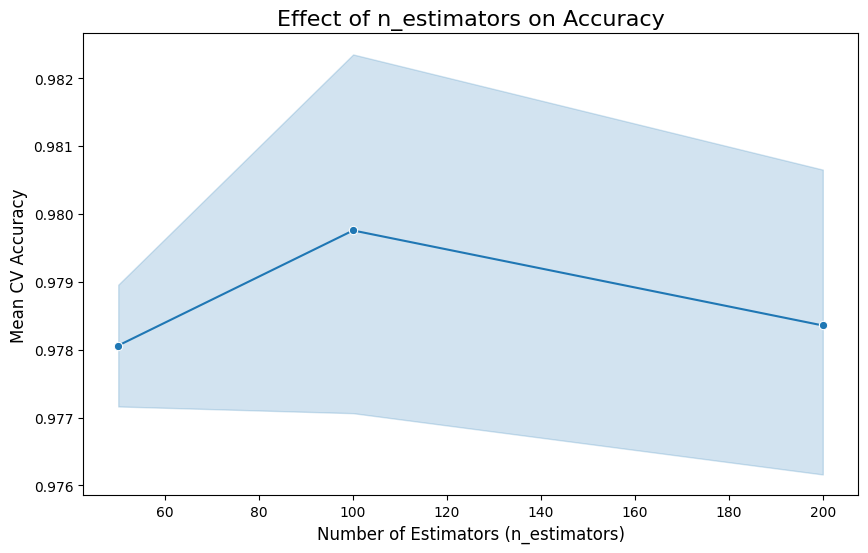

In [141]:
# Plot the performance vs. n_estimators (number of trees in the forest)
plt.figure(figsize=(10, 6))  # Set the size of the plot (10 inches wide, 6 inches tall)

# Line plot to show the relationship between n_estimators and mean cross-validation accuracy
sns.lineplot(
    data=results,                # DataFrame containing the Grid Search results
    x='param_n_estimators',      # Number of estimators (hyperparameter being evaluated)
    y='mean_test_score',         # Mean cross-validation accuracy for each hyperparameter value
    marker='o'                   # Use circles to mark data points on the line
)

# Add a title and labels to the plot for better interpretation
plt.title('Effect of n_estimators on Accuracy', fontsize=16)  # Title with larger font
plt.xlabel('Number of Estimators (n_estimators)', fontsize=12)  # Label for the x-axis
plt.ylabel('Mean CV Accuracy', fontsize=12)  # Label for the y-axis

# Display the plot
plt.show()


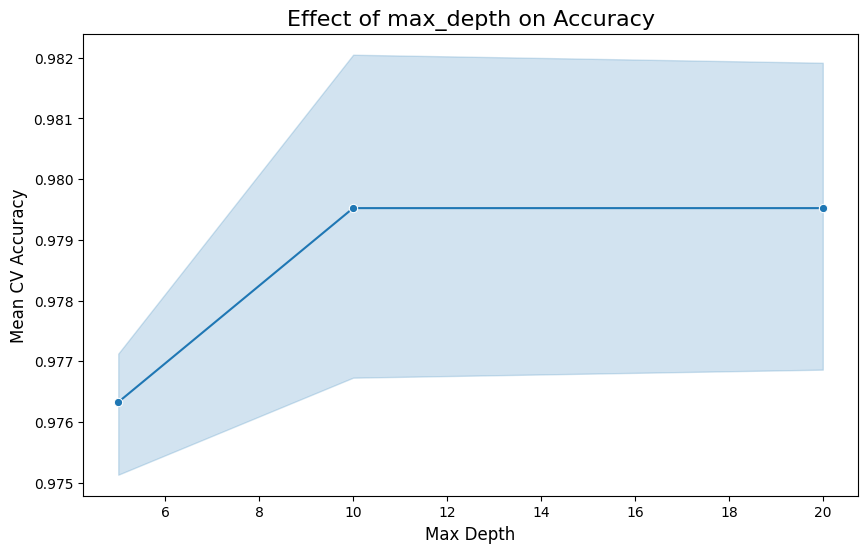

In [142]:
# Plot the performance vs. max_depth (maximum depth of the trees in the forest)
plt.figure(figsize=(10, 6))  # Set the size of the plot (10 inches wide, 6 inches tall)

# Line plot to show the relationship between max_depth and mean cross-validation accuracy
sns.lineplot(
    data=results,             # DataFrame containing the Grid Search results
    x='param_max_depth',      # Maximum depth of trees (hyperparameter being evaluated)
    y='mean_test_score',      # Mean cross-validation accuracy for each hyperparameter value
    marker='o'                # Use circles to mark data points on the line
)

# Add a title and labels to the plot for better interpretation
plt.title('Effect of max_depth on Accuracy', fontsize=16)  # Title with larger font
plt.xlabel('Max Depth', fontsize=12)                      # Label for the x-axis
plt.ylabel('Mean CV Accuracy', fontsize=12)               # Label for the y-axis

# Display the plot
plt.show()


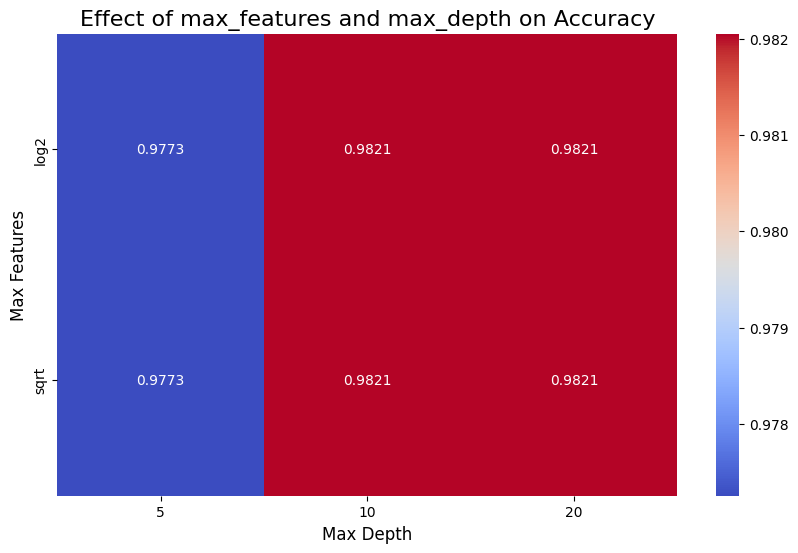

In [143]:
# Create a pivot table for heatmap data
heatmap_data = results.pivot_table(
    values='mean_test_score',        # Use mean cross-validation accuracy as the values
    index='param_max_features',      # Hyperparameter for max features (row labels)
    columns='param_max_depth'        # Hyperparameter for max depth (column labels)
)

# Set the size of the heatmap
plt.figure(figsize=(10, 6))  # Define the plot size (10 inches wide, 6 inches tall)

# Create a heatmap to visualize the relationship between max_features, max_depth, and accuracy
sns.heatmap(
    heatmap_data,                    # Data to be visualized
    annot=True,                      # Annotate each cell with its value
    fmt=".4f",                       # Format the annotations to 4 decimal places
    cmap='coolwarm'                  # Use the 'coolwarm' colormap for visual appeal
)

# Add a title and axis labels for better interpretation
plt.title('Effect of max_features and max_depth on Accuracy', fontsize=16)  # Title with larger font
plt.xlabel('Max Depth', fontsize=12)  # Label for the x-axis
plt.ylabel('Max Features', fontsize=12)  # Label for the y-axis

# Display the heatmap
plt.show()


In [144]:
from sklearn.metrics import accuracy_score, classification_report

# Get predictions for both training and test sets
train_predictions = best_rf.predict(X_train)  # Predict outcomes on the training set
test_predictions = best_rf.predict(X_test)    # Predict outcomes on the testing set

# Calculate accuracies for training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)  # Accuracy for training set
test_accuracy = accuracy_score(y_test, test_predictions)     # Accuracy for testing set

# Display the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")  # Print training accuracy with 4 decimal places
print(f"Test Accuracy: {test_accuracy:.4f}")       # Print testing accuracy with 4 decimal places

# Print Classification Report for both sets
print("\nClassification Report (Training Set):")
print(classification_report(y_train, train_predictions))  # Detailed classification metrics for the training set

print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_predictions))    # Detailed classification metrics for the testing set

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.1:
    # Model may be overfitting if training accuracy is significantly higher than test accuracy
    print("\nThe model may be overfitting. Consider tuning the hyperparameters or increasing regularization.")
elif test_accuracy > train_accuracy + 0.1:
    # Model may be underfitting if test accuracy is significantly higher than training accuracy
    print("\nThe model may be underfitting. Consider increasing model complexity or training longer.")
else:
    # Model seems balanced if training and test accuracies are close
    print("\nThe model seems to be well-fitted.")


Training Accuracy: 1.0000
Test Accuracy: 0.9916

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       732
           1       1.00      1.00      1.00       104

    accuracy                           1.00       836
   macro avg       1.00      1.00      1.00       836
weighted avg       1.00      1.00      1.00       836


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       316
           1       0.95      0.98      0.97        43

    accuracy                           0.99       359
   macro avg       0.98      0.99      0.98       359
weighted avg       0.99      0.99      0.99       359


The model seems to be well-fitted.


## Model Performance Evaluation

### Training and Test Accuracies
- **Training Accuracy**: 1.0000 (100%)
- **Test Accuracy**: 0.9916 (99.16%)

The model achieves perfect accuracy on the training data and an almost perfect score on the test data, indicating strong performance and generalization.

---

## Classification Report (Training Set)
| Metric        | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| **Class 0**   | 1.00      | 1.00   | 1.00     | 732     |
| **Class 1**   | 1.00      | 1.00   | 1.00     | 104     |
| **Overall**   |           |        |          |         |
| **Accuracy**  |           |        | 1.00     | 836     |
| **Macro Avg** | 1.00      | 1.00   | 1.00     | 836     |
| **Weighted Avg** | 1.00   | 1.00   | 1.00     | 836     |

### Key Observations:
- The model perfectly classifies both classes (`Class 0` and `Class 1`) on the training set.
- All metrics (precision, recall, F1-score) are 1.00 for each class, reflecting zero error.

---

## Classification Report (Test Set)
| Metric        | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| **Class 0**   | 1.00      | 0.99   | 1.00     | 316     |
| **Class 1**   | 0.95      | 0.98   | 0.97     | 43      |
| **Overall**   |           |        |          |         |
| **Accuracy**  |           |        | 0.99     | 359     |
| **Macro Avg** | 0.98      | 0.99   | 0.98     | 359     |
| **Weighted Avg** | 0.99   | 0.99   | 0.99     | 359     |

### Key Observations:
- **Class 0**:
  - Precision: 1.00
  - Recall: 0.99
  - F1-Score: 1.00
- **Class 1**:
  - Precision: 0.95
  - Recall: 0.98
  - F1-Score: 0.97
- The high precision and recall scores for both classes demonstrate excellent generalization.

---

## Overfitting/Underfitting Analysis
### Training vs. Test Accuracy:
- **Training Accuracy**: 1.0000 (100%)
- **Test Accuracy**: 0.9916 (99.16%)

### Model Fitting Conclusion:
- The difference between training and test accuracy is minimal (less than 0.1).
- **Conclusion**: The model is **well-fitted**, meaning it is neither overfitting nor underfitting.

---
